In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load evaluation results

In [46]:
DATASET = "census" #wine
PLOT_FILE = "../plots/plot_"+DATASET+".csv"

In [47]:
eval_df = pd.read_csv(PLOT_FILE, sep=",")

In [48]:
eval_df

,Model,Budget,Log Loss,Binary Err Rate,Specificity,Precision,Recall,Npv,F1,Roc Auc
0,Baseline [GBDT],0,0.300081,0.137866,0.935852,0.762730,0.635092,0.887623,0.802092,0.916728
1,Adversarial-Boosting [b=5],0,0.317257,0.144168,0.966022,0.831518,0.516464,0.860198,0.773609,0.913199
2,Adversarial-Boosting [b=15],0,0.318171,0.144610,0.967926,0.837416,0.508796,0.858535,0.771476,0.913467
3,Adversarial-Boosting [b=150],0,0.318685,0.144831,0.968219,0.838180,0.506991,0.858126,0.770835,0.913253
4,Adversarial-Boosting [b=300],0,0.318377,0.144500,0.969098,0.841592,0.505638,0.857902,0.770922,0.913692
5,Non-Interferent [b=5],0,0.288309,0.134439,0.933070,0.761358,0.657645,0.893548,0.809297,0.923131
6,Non-Interferent [b=15],0,0.288172,0.133333,0.933948,0.764245,0.659450,0.894139,0.810800,0.923153
7,Non-Interferent [b=150],0,0.287877,0.133002,0.933656,0.764062,0.661705,0.894737,0.811496,0.923354
8,Non-Interferent [b=300],0,0.288208,0.133112,0.933216,0.763117,0.662607,0.894944,0.811499,0.923355
9,Baseline [GBDT],5,0.330521,0.155556,0.912419,0.701894,0.635092,NaN,0.782680,0.897666


In [52]:
mask = eval_df.Model == "Baseline [GBDT]"
column_name = 'Model'
eval_df.loc[mask, column_name] = "GBDT"

In [53]:
eval_df

,Model,Budget,Log Loss,Binary Err Rate,Specificity,Precision,Recall,Npv,F1,Roc Auc
0,GBDT,0,0.300081,0.137866,0.935852,0.762730,0.635092,0.887623,0.802092,0.916728
1,Adversarial-Boosting [b=5],0,0.317257,0.144168,0.966022,0.831518,0.516464,0.860198,0.773609,0.913199
2,Adversarial-Boosting [b=15],0,0.318171,0.144610,0.967926,0.837416,0.508796,0.858535,0.771476,0.913467
3,Adversarial-Boosting [b=150],0,0.318685,0.144831,0.968219,0.838180,0.506991,0.858126,0.770835,0.913253
4,Adversarial-Boosting [b=300],0,0.318377,0.144500,0.969098,0.841592,0.505638,0.857902,0.770922,0.913692
5,Non-Interferent [b=5],0,0.288309,0.134439,0.933070,0.761358,0.657645,0.893548,0.809297,0.923131
6,Non-Interferent [b=15],0,0.288172,0.133333,0.933948,0.764245,0.659450,0.894139,0.810800,0.923153
7,Non-Interferent [b=150],0,0.287877,0.133002,0.933656,0.764062,0.661705,0.894737,0.811496,0.923354
8,Non-Interferent [b=300],0,0.288208,0.133112,0.933216,0.763117,0.662607,0.894944,0.811499,0.923355
9,GBDT,5,0.330521,0.155556,0.912419,0.701894,0.635092,NaN,0.782680,0.897666


# Plot data

In [54]:
def bar_plot_under_attack(df, metric, train_budget):

    fig, ax = plt.subplots(1, 1, figsize=(6,8))
    plt.ylim(.5,.85)
    
    models = ["GBDT", 
              "Adversarial-Boosting [b={}]".format(train_budget), 
              "Non-Interferent [b={}]".format(train_budget)]

    data = df[df["Model"].isin(models)].filter(regex=("Model|Budget|"+metric))
    
    palette={'GBDT': '#cf3721',
                             "Adversarial-Boosting [b={}]".format(train_budget): '#31a9b8', #'#f5be41',
                             "Non-Interferent [b={}]".format(train_budget): '#258039'
                            }

    _ = sns.barplot(x="Budget", y=metric, hue="Model", data=data, ax=ax)
    _ = ax.set_xlabel("budget", fontsize=26, labelpad=12)
    ylabel = metric
    if metric == "F1":
        ylabel = "$F_1\ score$"
    _ = ax.set_ylabel(ylabel, fontsize=26, labelpad=6)
    start, end = ax.get_ylim()
    _ = ax.yaxis.set_ticks(np.arange(start, end, 0.1))
    _ = ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    _ = ax.legend(loc='lower center', borderaxespad=0.2, fontsize=20)

    
#     handles, labels = ax[i].get_legend_handles_labels()
#     fig.legend(handles, labels, loc='best', borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2

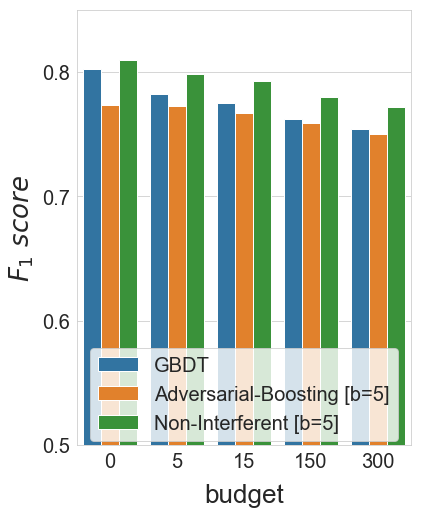

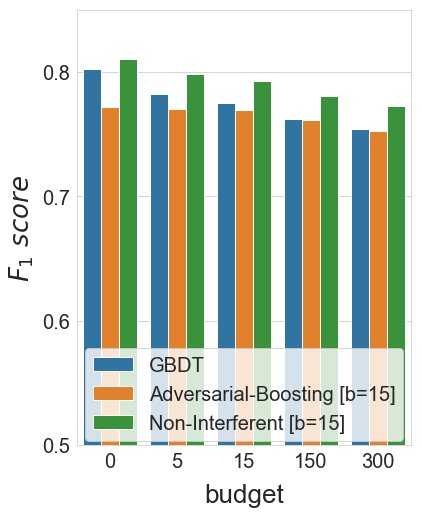

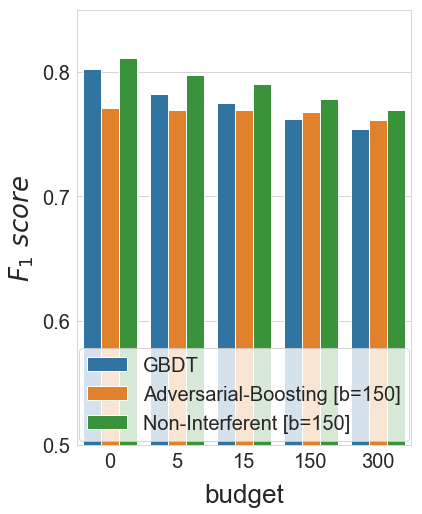

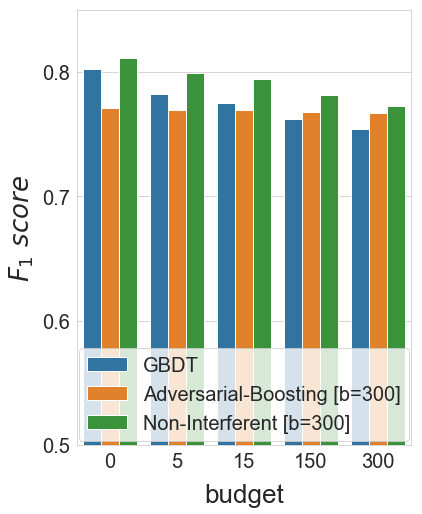

In [55]:
sns.set_style("whitegrid")
for i, b in enumerate([5, 15, 150, 300]):
    bar_plot_under_attack(eval_df, "F1", b)

In [56]:
def precision_recall(df, train_budget, att_budget):

    fig, ax = plt.subplots(1, 1, figsize=(6,8))
    #plt.title("Training budget = {} / Testing budget = {}".format(train_budget, att_budget), fontsize=16, pad=12)
    
    models = ["GBDT", 
              "Adversarial-Boosting [b={}]".format(train_budget), 
              "Non-Interferent [b={}]".format(train_budget)]
    

    data = df[df["Model"].isin(models)].filter(regex=("Model|Budget|Precision|Recall"))

    _ = data[data.Budget == att_budget].plot(x="Budget", y=["Precision", "Recall"], kind="bar", ax=ax, color=['#31a9b8', '#cf3721'])
    _ = ax.set_xticklabels(["GBDT", 
                            "Adversarial-Boosting", "Non-Interferent",
                           ], rotation=45
                          )
    _ = ax.set_xlabel("Models", fontsize=26, labelpad=12)
    _ = ax.set_xlabel("")
    ylabel = "Precision / Recall"
    _ = ax.set_ylabel(ylabel, fontsize=26, labelpad=6)
    _ = ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    _ = ax.legend(loc='lower center', borderaxespad=0.5, fontsize=20)

In [57]:
import itertools
from operator import itemgetter

b = [0,5,15,150,300]
c = list(itertools.product(b, b))
pairs = sorted(c, key=itemgetter(0,1))
pairs[0:5] = []

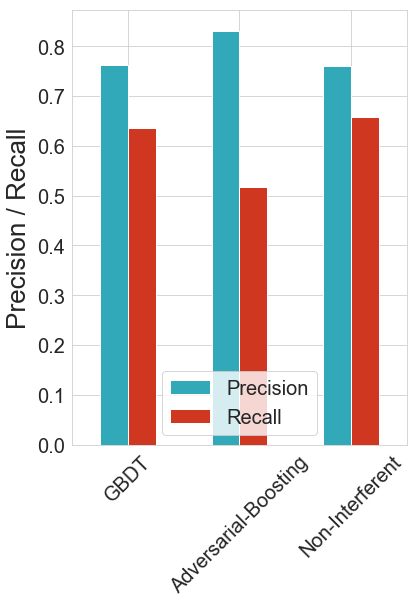

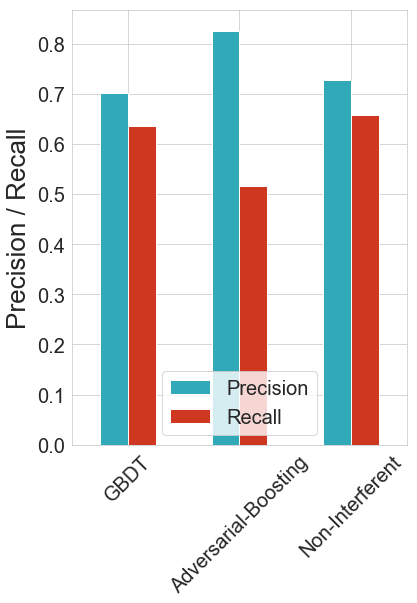

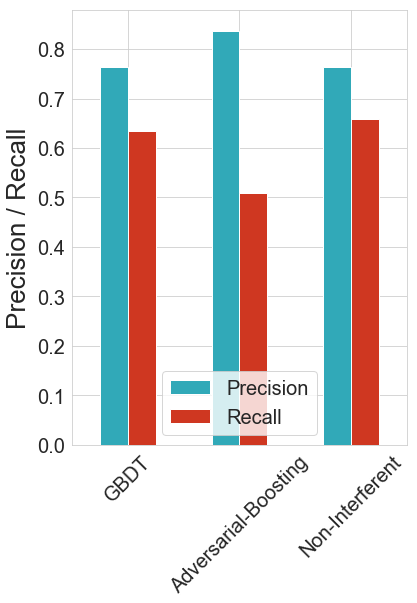

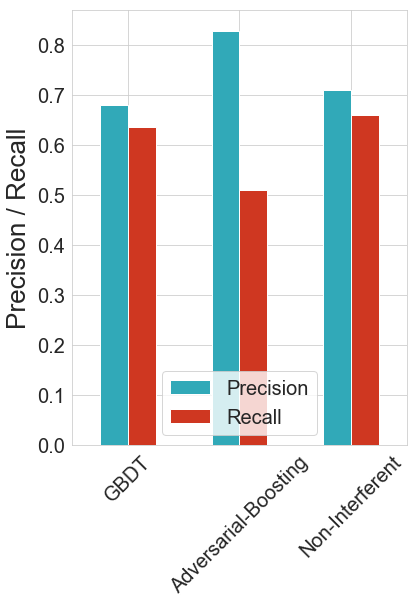

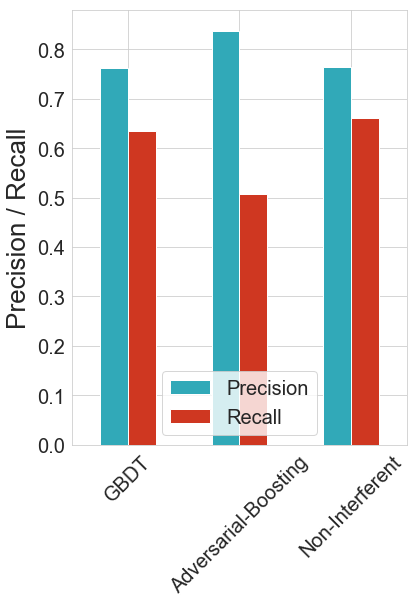

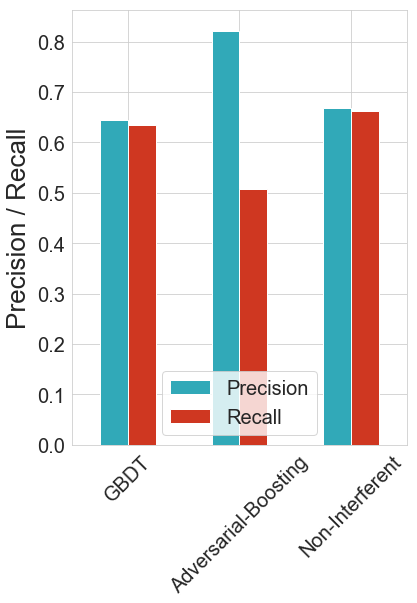

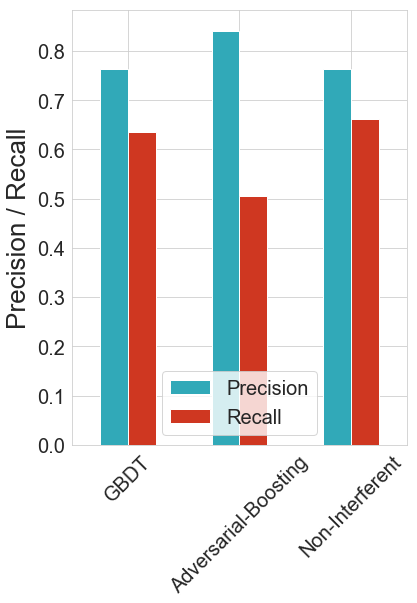

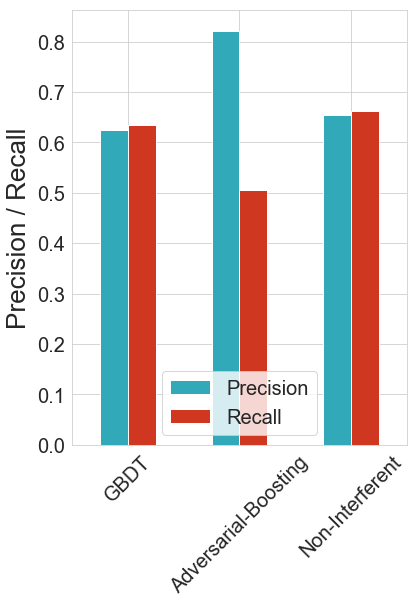

In [58]:
sns.set_style("whitegrid")
for tb, ab in pairs:
    if tb == ab or ab == 0:
        precision_recall(eval_df, tb, ab)

# Figure 1

In [ ]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.50]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.10]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10,  label="Weighted-Non-Interferent [alpha=0.50] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D',  ms=10,  label="Weighted-Non-Interferent [alpha=0.10] (under attack)")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$] (under attack)")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC$ / $AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC$ / $AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees.pdf")

In [ ]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
#          color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#f5be41', marker='X', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.50$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#31a9b8', marker='D', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.10$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         color='#f5be41', marker='X', ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.50$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         color='#31a9b8', marker='D',  ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.10$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$]")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees_alpha.pdf")
#plt.savefig("unattacked_roc_auc_trees_alpha.pdf")